# Imágenes MNIST

In [20]:
import sys
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append('../py')
from exp import *

# Include path to binaries on PATH variable
bin_path = os.path.join(os.path.dirname('../'))
os.environ['PATH'] = "{}:{}".format(bin_path, os.environ['PATH'])

In [21]:
def plot_digits(samples, rows, cols, base_num=0):
    plt.figure(figsize=(14,8))
    for i in list(range(rows * cols)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(samples[i].reshape(28, 28), cmap='gray')
        plt.title('Muestra {}'.format(i + base_num), size=10)
        plt.xticks(())
        plt.yticks(())

In [28]:
X, y = load_data('../data/train.csv')

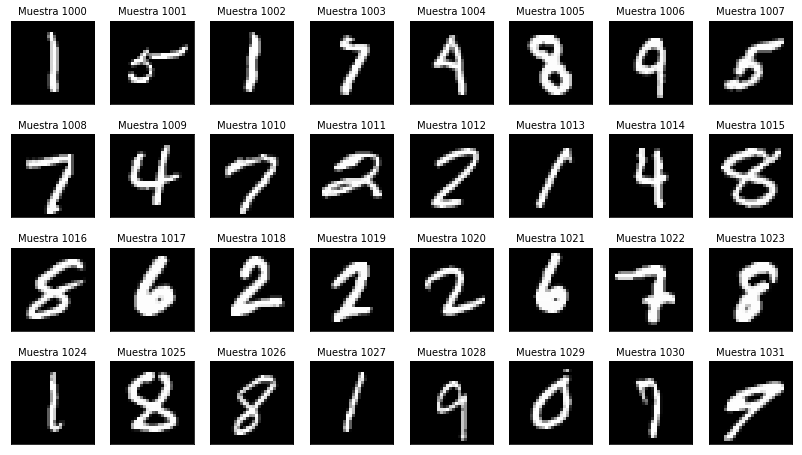

In [10]:
plot_digits(X[1000:1032], 4, 8, 1000)

In [57]:
Xtest = np.loadtxt('../data/test.csv', delimiter=',', skiprows=1, dtype=np.uint8)

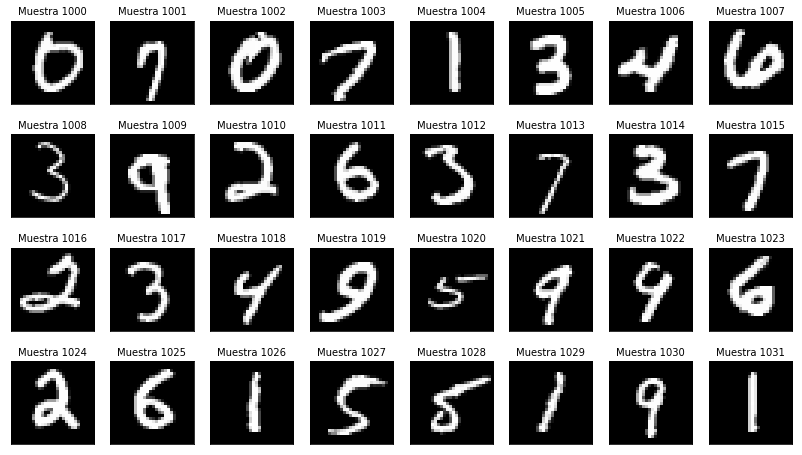

In [19]:
plot_digits(Xtest[1000:1032], 4, 8, 1000)

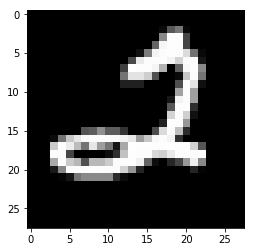

In [88]:
siete = Xtest[1016].reshape(28, 28)
plt.imshow(siete, cmap='gray')

In [69]:
from scipy import ndimage

(14.456657442563872, 13.587811313469334)

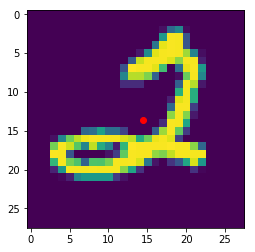

In [96]:
cy, cx = ndimage.measurements.center_of_mass(siete)
plt.imshow(siete)
plt.plot(cx, cy, 'ro')
cx, cy

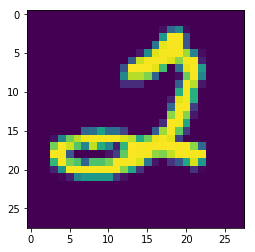

In [100]:
plt.imshow(ndimage.interpolation.shift(siete, [14 - round(cx), 14 - round(cy)]))

In [82]:
[round(14 - cy), round(14 - cx)]

[-0.0, -0.0]

Ya están centradas!!

## Usando el dataset original

In [15]:
import numpy as np
from mnist import MNIST
mndata = MNIST('../data/')
images, labels = mndata.load_training()
images = np.array(images)
labels = np.array(labels)

In [17]:
images.shape, labels.shape

((60000, 784), (60000,))

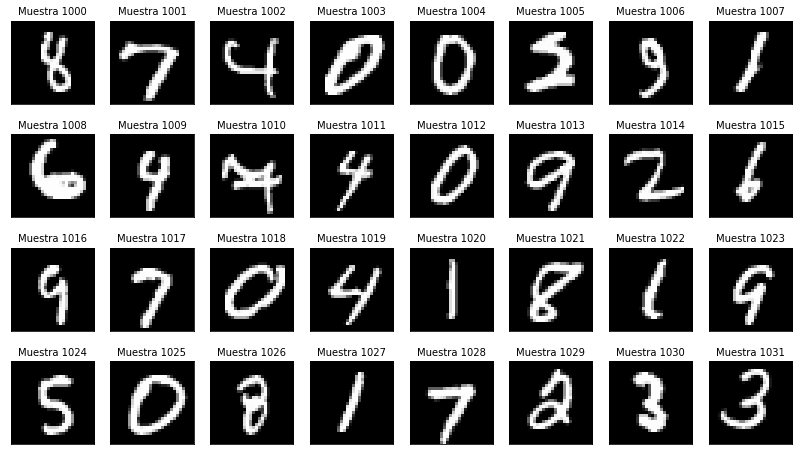

In [23]:
plot_digits(images[7000:7032], 4, 8, 1000)

In [25]:
scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}
clf = KnnClassifier(k=3, alpha=37, with_pca=True, quiet=False)
res = cross_validate(clf, images, labels, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)

Método: k-NN + PCA
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp11bkqfbi... listo.
Tamaño dataset: 48003
Corriendo PCA... listo.
Autovalores: 334307 244285 211395 184208 167127 147899 112765 99094.4 95028.1 79944.6 72650.3 69733.7 58615.7 58207.4 54131.9 51116.2 45232.9 43497.2 40602.5 39599.2 36486.6 34529.3 32726.3 31524 30253.4 28795.9 27856.5 26938.5 25397.9 23696.1 22579.6 22280.6 20502.1 20136.5 19482 18544.5 17305.7 
Transformando dataset... listo.

Método: k-NN + PCA
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpmxn8w1xn... listo.
Tamaño dataset: 47998
Corriendo PCA... listo.
Autovalores: 333910 244636 208929 183714 167018 147687 111624 98077.2 94111.2 80250.4 72264.6 68926.4 58364.5 57621.3 54121.1 50503 45363.6 43866.4 40550.3 39473 36365.6 34172.1 32446.6 31131.7 29883.3 28661.5 27650.1 26768.1 25359.5 23501.5 22466.2 22020.7 20633 20031.9 19351.7 18589.8 17401.2 
Transformando dataset... li

In [31]:
np.mean(res['test_acc']), np.mean(res['test_f1'])

(0.97589983434407457, 0.97570320879723538)

In [29]:
res2 = cross_validate(clf, X, y, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)

Método: k-NN + PCA
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpy7h7a4m5... listo.
Tamaño dataset: 33595
Corriendo PCA... listo.
Autovalores: 335186 245786 210929 183796 168339 148064 112894 99499.6 94872.2 80585.4 71947.1 71026.7 58287.5 57937.4 54248.8 51181 45313.1 43975.9 40885.4 39462.4 36627.3 34721.7 32995.4 31128 30445.9 28734 27763.6 26690.4 25447.1 23687.1 22392.4 21907.9 20447.3 20229.8 19492 18590 17498.3 
Transformando dataset... listo.

Método: k-NN + PCA
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmppb5mgdr6... listo.
Tamaño dataset: 33601
Corriendo PCA... listo.
Autovalores: 335666 247543 210630 184655 168389 147769 112192 99047.9 95977.5 80757.4 71961.9 70530.4 58443.5 57815.9 54322.8 50895.9 45181.7 44036.8 40784.9 39656.3 36982.7 35106.4 33281.3 31421.5 30394.2 28978.2 27857.4 26689.4 25297.6 23534.5 22576.2 21881.1 20565.7 20162.5 19315.7 18545.3 17531.7 
Transformando dataset... li

In [32]:
np.mean(res2['test_acc']), np.mean(res2['test_f1'])

(0.97376147818957681, 0.9736694533648611)